In [1]:
#import necessary libraries for logistic regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [2]:
data = pd.read_csv('Bank.csv')
data.head()

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
# allocate x and y
x = data.drop(['y'], axis=1)
y = data['y']

In [4]:
y.value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [6]:
from imblearn.over_sampling import SMOTE, ADASYN

In [7]:
smt = SMOTE()

In [8]:
x1, y1 = smt.fit_resample(x, y)

In [9]:
y1.value_counts()

y
0    36548
1    36548
Name: count, dtype: int64

In [10]:
x1.shape

(73096, 7)

In [11]:
ada = ADASYN()

In [12]:
x2, y2 = ada.fit_resample(x, y)

In [13]:
y2.value_counts()

y
1    37340
0    36548
Name: count, dtype: int64

In [14]:
x2.shape

(73888, 7)

**SMOTE** - x1, y1
**ADASYN** - x1, y2

In [15]:
# allocate training split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=100)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=100)

In [16]:
len(x1_train)
len(x2_train)

59110

In [17]:
# train the model
model = LogisticRegression()
model.fit(x1_train, y1_train)
model.fit(x2_train, y2_train)

LogisticRegression()

In [18]:
model.intercept_

array([0.00323455])

In [19]:
model.coef_

array([[-0.00633293,  0.00614258, -0.34880053,  0.23524444,  0.03640945,
        -0.33211374, -0.00418159]])

In [20]:
y1_pred = model.predict(x1_test)
y2_pred = model.predict(x2_test)

In [21]:
y1_test

62994    1
32323    0
61302    1
57412    1
36631    1
        ..
50879    1
24400    0
58734    1
68007    1
16308    0
Name: y, Length: 14620, dtype: int64

In [22]:
y2_test

11765    0
20982    0
35106    0
5232     0
51770    1
        ..
57762    1
58569    1
2929     0
63414    1
32776    0
Name: y, Length: 14778, dtype: int64

In [23]:
y1_pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [24]:
y2_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [25]:
y1_pred_prob = model.predict_proba(x1_test)
# probability value prediction for 0 and 1
# If it is more than 0.5 we can decide whether it is 0 or 1
# Here the positive class has been taken as 0
y1_pred_prob

array([[0.56450436, 0.43549564],
       [0.44250944, 0.55749056],
       [0.11723814, 0.88276186],
       ...,
       [0.08742082, 0.91257918],
       [0.13050953, 0.86949047],
       [0.91800411, 0.08199589]])

In [26]:
y2_pred_prob = model.predict_proba(x2_test)
# probability value prediction for 0 and 1
# If it is more than 0.5 we can decide whether it is 0 or 1
# Here the positive class has been taken as 0
y2_pred_prob

array([[0.9686113 , 0.0313887 ],
       [0.93568695, 0.06431305],
       [0.92229891, 0.07770109],
       ...,
       [0.75648999, 0.24351001],
       [0.33281003, 0.66718997],
       [0.8732148 , 0.1267852 ]])

In [27]:
y1_pred_prob = model.predict_proba(x1_test)[:, 1]
# getting predicted probability values of class 1 as a 1D array
y2_pred_prob = model.predict_proba(x2_test)[:, 1]
# getting predicted probability values of class 1 as a 1D array

In [28]:
y1_pred_prob

array([0.43549564, 0.55749056, 0.88276186, ..., 0.91257918, 0.86949047,
       0.08199589])

In [29]:
y2_pred_prob

array([0.0313887 , 0.06431305, 0.07770109, ..., 0.24351001, 0.66718997,
       0.1267852 ])

In [30]:
confusion_matrix(y1_test, y1_pred)

array([[5773, 1490],
       [ 737, 6620]], dtype=int64)

In [31]:
confusion_matrix(y2_test, y2_pred)

array([[5767, 1492],
       [1203, 6316]], dtype=int64)

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()
data_normalised = scaler.fit_transform(data)

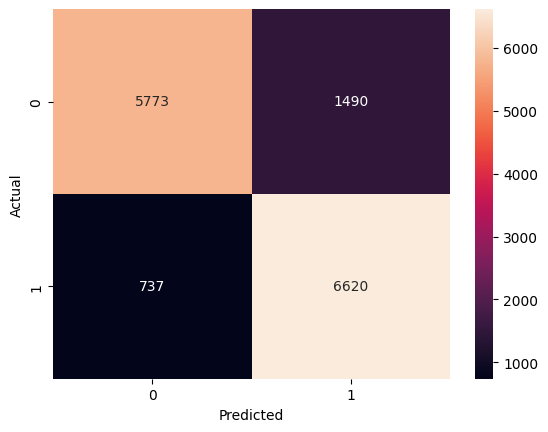

In [34]:
sns.heatmap(confusion_matrix(y1_test, y1_pred), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

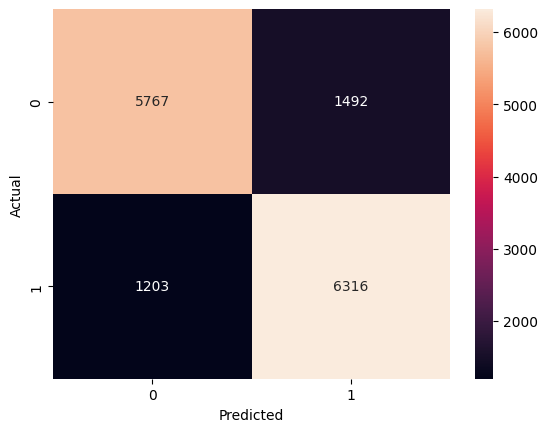

In [35]:
sns.heatmap(confusion_matrix(y2_test, y2_pred), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [36]:
accuracy_score(y1_test, y1_pred)

0.8476744186046512

In [37]:
accuracy_score(y2_test, y2_pred)

0.8176343212884016

In [38]:
classification_report(y1_test, y1_pred)
print('Use SMOTE', classification_report(y1_test, y1_pred))

Use SMOTE               precision    recall  f1-score   support

           0       0.89      0.79      0.84      7263
           1       0.82      0.90      0.86      7357

    accuracy                           0.85     14620
   macro avg       0.85      0.85      0.85     14620
weighted avg       0.85      0.85      0.85     14620



In [39]:
classification_report(y2_test, y2_pred)
print('Use ADASYN', classification_report(y2_test, y2_pred))

Use ADASYN               precision    recall  f1-score   support

           0       0.83      0.79      0.81      7259
           1       0.81      0.84      0.82      7519

    accuracy                           0.82     14778
   macro avg       0.82      0.82      0.82     14778
weighted avg       0.82      0.82      0.82     14778



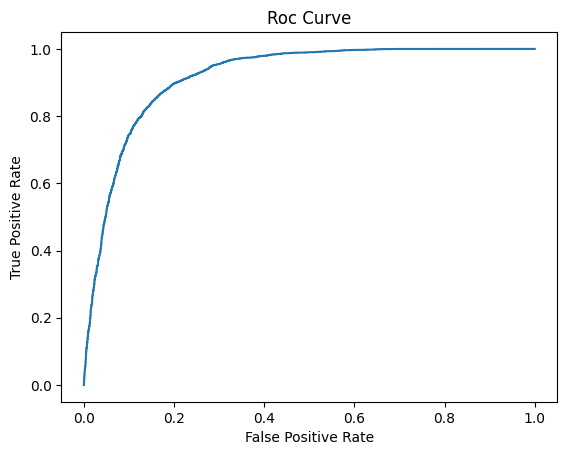

In [40]:
fpr, tpr,_ = roc_curve(y1_test, y1_pred_prob)

plt.plot(fpr, tpr)
plt.title('Roc Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

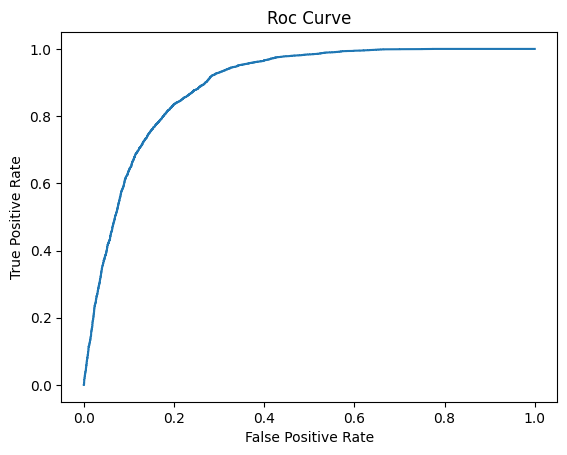

In [41]:
fpr, tpr,_ = roc_curve(y2_test, y2_pred_prob)

plt.plot(fpr, tpr)
plt.title('Roc Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [42]:
roc_auc_score(y1_test, y1_pred_prob)

0.917744068085927

In [43]:
roc_auc_score(y2_test, y2_pred_prob)

0.8921668632786838